In [ ]:
import os 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm 
import glob
import torch.nn as nn
import torch
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
batch_size=1
# patch_size=32
lr = 0.0002
crit_repeats = 5
c_lambda = 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset

In [ ]:
!wget "http://www.vision.ee.ethz.ch/ntire18/o-haze/O-HAZE.zip"

In [ ]:
!unzip "/content/O-HAZE.zip"

In [ ]:
!cd "/content/# O-HAZY NTIRE 2018/GT";rm -r ".ipynb_checkpoints"

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5)),
    
])

In [ ]:
class patch_dataset(Dataset):

  def __init__(self, dataset_root, transforms=None):
    
    self.transforms = transforms
    self.dataset_root = dataset_root
    self.GT_files = os.listdir(os.path.join(dataset_root, "GT"))
    # self.hazy = os.listdir(os.path.join(dataset_root, "hazy"))
    # GT_path = os.path.join(dataset_root, "GT")
    # hazy_path = os.path.join(dataset_root, "hazy")

    # self.pairs = []

    # for folder in tqdm(os.listdir(GT_path)):

    #   for image_name in os.listdir(os.path.join(GT_path, folder)):
        
    #     hazy_image_name = image_name.split(".")[0].split("_")
    #     hazy_image_name[2] = "hazy"
    #     hazy_image_name = "_".join(hazy_image_name)
    #     hazy_image_name = hazy_image_name + ".jpg"

    #     folder_hazy = folder.split("_")
    #     folder_hazy[2] = "hazy"
    #     folder_hazy = "_".join(folder_hazy)
        

    #     hazy = os.path.join(hazy_path, folder_hazy, hazy_image_name)
    #     gt = os.path.join(GT_path, folder, image_name)

    #     self.pairs.append((hazy, gt))
      

  def __getitem__(self, index):
    
    # haze_path, gt_path = self.pairs[index]

    # hazed_image = np.array(Image.open(haze_path))
    # hazed_image = hazed_image[:, :, 0] # Red Channel
    # hazed_image = Image.fromarray(hazed_image)

    # gt_image = np.array(Image.open(gt_path))
    # gt_image = gt_image[:, :, 0] # Red Channel
    # gt_image = Image.fromarray(gt_image)

    GT_path = self.GT_files[index]
    hazy_path = GT_path.split("_")[0] + "_outdoor_hazy.jpg"

    GT_image = Image.open(os.path.join(self.dataset_root, "GT", GT_path))
    hazy_image = Image.open(os.path.join(self.dataset_root, "hazy", hazy_path))

    if self.transforms != None :
      hazed_image = self.transforms(hazy_image)
      gt_image = self.transforms(GT_image)

    
    return (hazed_image, gt_image)
    
  
  def __len__(self):
    return len(self.GT_files)

In [ ]:
dataset = patch_dataset("/content/# O-HAZY NTIRE 2018", transform)

In [ ]:
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# def make_tile(image_path, path_to_save, patch_size=32):

#   img = Image.open(image_path)
#   image_name = image_path.split("/")[-1].split(".")[0]

#   if not os.path.exists(os.path.join(path_to_save, image_name)):
#     os.mkdir(os.path.join(path_to_save, image_name))

#   tiles = 0
  
#   for w in range(0, img.size[0], patch_size):
    
#     for h in range(0, img.size[1], patch_size):
      
#       w_end = w + patch_size
#       h_end = h + patch_size

#       cropped = np.array(img)[h: h_end, w: w_end]

#       if cropped.shape != (patch_size, patch_size, 3):
#         continue
      
#       path_to_save_image = os.path.join(path_to_save, image_name, "{}_tiles_{}.jpg".format(image_name, tiles))
#       Image.fromarray(cropped).save(path_to_save_image)

#       tiles += 1


In [ ]:
# for image_path in tqdm(glob.glob("/content/# O-HAZY NTIRE 2018/GT/*")):
#   make_tile(image_path, "/content/drive/MyDrive/hazy_dataset/GT")

In [ ]:
# !rm -r "/content/drive/MyDrive/hazy_dataset/GT/01_outdoor_GT"

In [ ]:
# GT_extracted = ["06", "14", "15", "19", "21", "29", "30", "33", "35", "37", "40", "42", "45"]

In [ ]:
# hazy_path = glob.glob("/content/# O-HAZY NTIRE 2018/hazy/*")
# hazy_path = list(filter(lambda x: str(x.split("/")[-1][:2]) in GT_extracted, hazy_path))
# hazy_path

In [ ]:
# for image_path in tqdm(hazy_path):
#   make_tile(image_path, "/content/drive/MyDrive/hazy_dataset/hazy")

In [ ]:
# len(glob.glob("/content/drive/MyDrive/hazy_dataset/hazy/40_outdoor_hazy/*"))

11445

## DataLoader

## Loss

In [ ]:
# def gradient_penalty(crit, fake, real, epsilon):

#   mixed_images = epsilon * fake + (1 - epsilon) * real
#   mixed_scores = crit(mixed_images)

#   gradient = torch.autograd.grad(
#       inputs=mixed_images,
#       outputs=mixed_scores,
#       grad_outputs=torch.ones_like(mixed_scores),
#       retain_graph=True,
#       create_graph=True,
#   )[0]

#   gradient_norm = gradient.norm(2, dim=1)

#   gradient_penalty = torch.mean((gradient_norm - 1) ** 2)

#   return gradient_penalty

In [ ]:
# def get_gen_loss(critic_fake_pred):

#   gen_loss = - torch.mean(critic_fake_pred)
  
#   return gen_loss

In [ ]:
# def get_critic_loss(critic, crit_fake_pred, crit_real_pred, gp):

#   crit_loss =  - torch.mean(crit_real_pred - crit_fake_pred) + c_lambda * gp

#   return crit_loss

## Training

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_tensor_images(image_tensor, num_images=25, size=(3, 32, 32)):
  
  image_tensor = (image_tensor + 1) / 2 # between 0 and 1 
  image_tensor = image_tensor.cpu().detach()

  image_grid = make_grid(image_tensor[:num_images], nrow=5)
  plt.imshow(image_grid.permute(1, 2, 0).squeeze())
  plt.show()


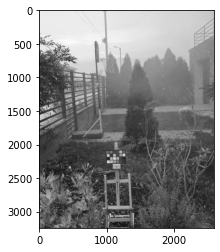

  0%|          | 0/4040 [00:00<?, ?it/s]

generator loss :  2.98602
discriminator loss :  6.73762


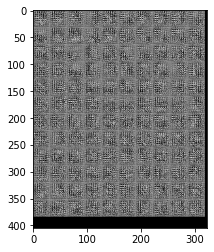

generator loss :  7.44766
discriminator loss :  2.20492


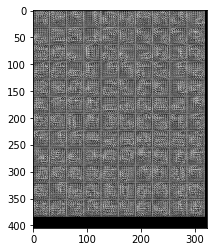

generator loss :  11.8195
discriminator loss :  -2.80704


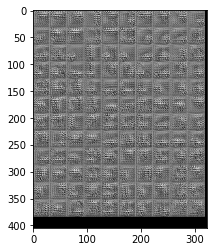

generator loss :  16.37846
discriminator loss :  -10.12267


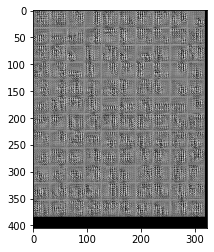

generator loss :  21.00458
discriminator loss :  -18.17233


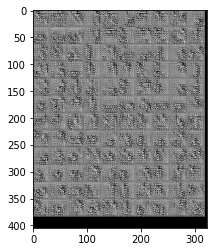

generator loss :  18.07072
discriminator loss :  -21.35664


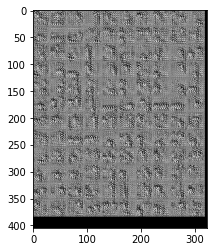

generator loss :  21.85666
discriminator loss :  -25.89864


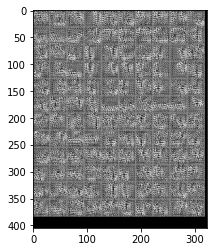

generator loss :  30.66594
discriminator loss :  -36.99795


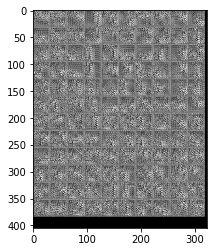

generator loss :  42.46997
discriminator loss :  -63.06924


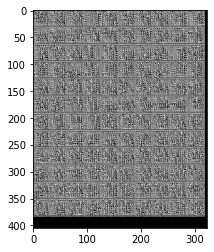

generator loss :  68.72759
discriminator loss :  -87.1413


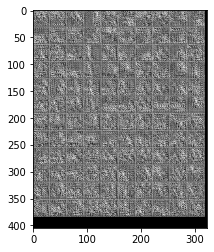

generator loss :  91.55006
discriminator loss :  -123.00675


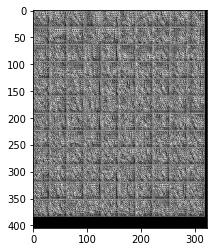

generator loss :  93.67492
discriminator loss :  -127.97405


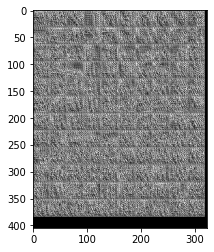

generator loss :  119.48186
discriminator loss :  -154.39282


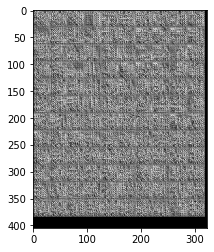

generator loss :  117.38715
discriminator loss :  -148.52513


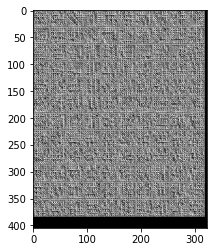

generator loss :  139.12241
discriminator loss :  -186.8345


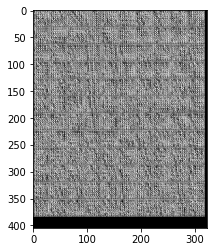

generator loss :  161.31134
discriminator loss :  -222.9467


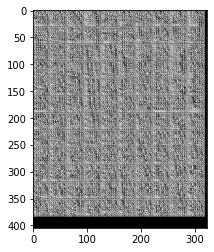

generator loss :  185.2697
discriminator loss :  -238.03003


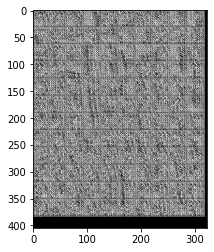

generator loss :  214.31818
discriminator loss :  -296.83701


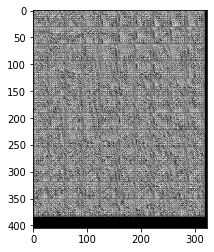

KeyboardInterrupt: ignored

In [ ]:
# cur_step = 0

# plt.imshow(np.array(Image.open("/content/# O-HAZY NTIRE 2018/hazy/02_outdoor_hazy.jpg"))[:, :, 0], cmap="gray")
# plt.show()

# for epoch in range(5):
  
#   for iteration, (X, y) in enumerate(tqdm(train_loader)):
    
#     # training Critic
#     for i in range(crit_repeats):

#       critic_optim.zero_grad()

#       fake = gen(X).detach()
#       crit_fake_pred = crit(fake)
#       crit_real_pred = crit(y)

#       epsilon = torch.rand(len(X), 1, 1, 1, requires_grad=True)

#       gp = gradient_penalty(crit, fake, y, epsilon)

#       crit_loss = get_critic_loss(crit, crit_fake_pred, crit_real_pred, gp)

#       crit_loss.backward(retain_graph=True)

#       critic_optim.step()
      

#     ## training generator
#     gen_optim.zero_grad()
#     fake_2 = gen(X) 
#     crit_fake_pred = crit(fake_2)
#     gen_loss = get_gen_loss(crit_fake_pred)
#     gen_loss.backward()
#     gen_optim.step()



#     if iteration % 50 == 0:
#       print("generator loss : ", np.round(gen_loss.item(), 5))
#       print("discriminator loss : ", np.round(crit_loss.item(), 5))

#       with torch.no_grad():
        
#         # X, y = next(iter(train_loader))
#         # gen_out_test = gen(X)
#         # show_tensor_images(X, num_images=1)
#         test_gen(gen, epoch, iteration)

#         torch.save({
#             "generator_state_dict": gen.state_dict(),
#             "generator_optimizer_dict": gen_optim.state_dict(),
#             "discriminator_state_dict": crit.state_dict(),
#             "disc_optimizer_dict": critic_optim.state_dict(),
#         }, "/content/drive/MyDrive/dehazing_checkpoints/ckpt_epoch_{}_iter_{}.pth".format(epoch, iteration))
        
       

#     cur_step += 1 


In [ ]:
# steps = [0, 100, 300, 600, 800 , 1200, 1400]

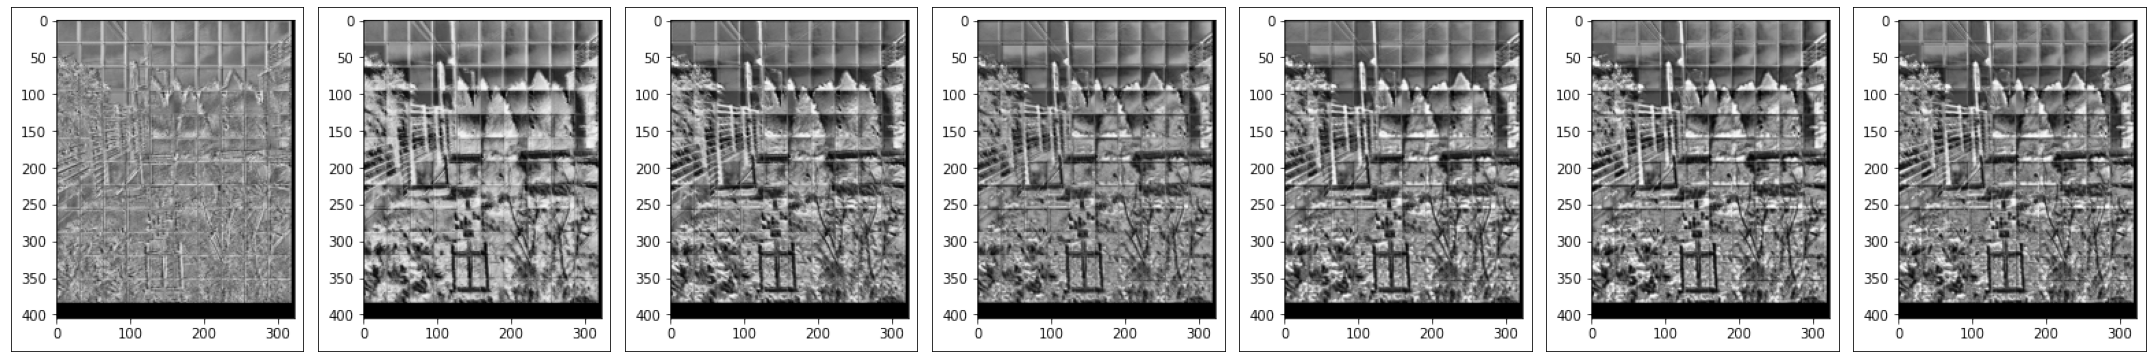

In [ ]:
# fig, ax = plt.subplots(1, len(steps), figsize=(30, 10))
# for i, step in enumerate(steps):
#   ax[i].imshow(Image.open("./step{}.png".format(step)))

#   ax[i].get_xaxis().set_visible(False)
#   ax[i].get_yaxis().set_visible(False)

# plt.tight_layout()
# plt.show()

In [ ]:
import torchvision.models as models

In [ ]:
vgg_pretrained_features = models.vgg16(pretrained=True).features
feature_extractor = nn.Sequential()

for i in range(12):
  feature_extractor.add_module(str(i), vgg_pretrained_features[i])

for module in feature_extractor:
  for param in module.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

## Generator and Discriminator

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        haze_class = models.densenet121(pretrained=True)

        ############# Block0-down  ##############
        self.conv0 = haze_class.features.conv0
        self.relu0 = haze_class.features.relu0
        self.pool0 = haze_class.features.pool0

        ############# Block1-down ##############
        self.dense_block1 = haze_class.features.denseblock1
        self.trans_block1 = haze_class.features.transition1

        ############# Block2-down ##############
        self.dense_block2 = haze_class.features.denseblock2
        self.trans_block2 = haze_class.features.transition2

        ############# Block3-down ##############
        self.dense_block3 = haze_class.features.denseblock3
        self.trans_block3 = haze_class.features.transition3
        self.res31 = BasicResBlock(512, 512)
        self.res32 = BasicResBlock(512, 512)

        ############# Block4-up ##############
        self.dense_block4 = BottleneckBlock(512, 256)
        self.trans_block4 = TransitionBlock(768, 128)
        self.res41 = BasicResBlock(387, 387)
        self.res42 = BasicResBlock(387, 387)

        ############# Block3-up ##############
        self.dense_block5 = BottleneckBlock(387, 256)
        self.trans_block5 = TransitionBlock(643, 128)
        self.res51 = BasicResBlock(259, 259)
        self.res52 = BasicResBlock(259, 259)

        ############# Block2-up ##############
        self.dense_block6 = BottleneckBlock(259, 128)
        self.trans_block6 = TransitionBlock(387, 64)
        self.res61 = BasicResBlock(67, 67)
        self.res62 = BasicResBlock(67, 67)

        ############# Block1-up ##############
        self.dense_block7 = BottleneckBlock(67, 64)
        self.trans_block7 = TransitionBlock(131, 32)
        self.res71 = BasicResBlock(35, 35)
        self.res72 = BasicResBlock(35, 35)

        ############# Block0-up ##############
        self.dense_block8 = BottleneckBlock(35, 32)
        self.trans_block8 = TransitionBlock(67, 16)

        # multi-scale
        self.conv_refin = nn.Conv2d(19, 20, 3, 1, 1)
        self.refout = nn.Conv2d(20, 3, kernel_size=3, stride=1, padding=1)
        self.relu = nn.LeakyReLU(0.2, inplace=True)
        self.tanh = nn.Tanh()

    def forward(self, x):
        ## input: 1024 x 1024

        x0 = self.pool0(self.relu0(self.conv0(x)))  # 256 x 256

        x1 = self.dense_block1(x0)  # 256 x 256

        x1 = self.trans_block1(x1)  # 128 x 128

        x2 = self.trans_block2(self.dense_block2(x1))  # 64 x 64

        x3 = self.trans_block3(self.dense_block3(x2))  # 32 x 32
        x3 = self.res31(x3)  # 32 x 32
        x3 = self.res32(x3)  # 32 x 32

        x4 = self.trans_block4(self.dense_block4(x3))  # 64 x 64
        x43 = F.avg_pool2d(x, 16)  # 64 x 64
        x42 = torch.cat([x4, x2, x43], 1)  # 64 x 64
        x42 = self.res41(x42)  # 64
        x42 = self.res42(x42)  # 64

        x5 = self.trans_block5(self.dense_block5(x42))  # 128
        x53 = F.avg_pool2d(x, 8)  # 128
        x52 = torch.cat([x5, x1, x53], 1)  # 128
        x52 = self.res51(x52)  # 128
        x52 = self.res52(x52)  # 128

        x6 = self.trans_block6(self.dense_block6(x52))  # 256
        x63 = F.avg_pool2d(x, 4)  # 256
        x62 = torch.cat([x6, x63], 1)  # 256
        x62 = self.res61(x62)  # 256
        x6 = self.res62(x62)  # 256

        x7 = self.trans_block7(self.dense_block7(x6))  # 512
        x73 = F.avg_pool2d(x, 2)  # 512
        x72 = torch.cat([x7, x73], 1)  # 512
        x72 = self.res71(x72)  # 512
        x7 = self.res72(x72)  # 512

        x8 = self.trans_block8(self.dense_block8(x7))  # 1024
        x8 = torch.cat([x8, x], 1)  # 1024

        x9 = self.relu(self.conv_refin(x8))  # 1024

        dehaze = self.tanh(self.refout(x9))

        return dehaze


class BottleneckBlock(nn.Module):
    def __init__(self, in_planes, out_planes):
        super(BottleneckBlock, self).__init__()
        inter_planes = out_planes * 4
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(in_planes, inter_planes, kernel_size=1, stride=1,
                               padding=0, bias=False)
        self.conv2 = nn.Conv2d(inter_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(self.relu(x))
        out = self.conv2(self.relu(out))
        return torch.cat([x, out], 1)


class TransitionBlock(nn.Module):
    def __init__(self, in_planes, out_planes):
        super(TransitionBlock, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.ConvTranspose2d(in_planes, out_planes, kernel_size=1, stride=1,
                                        padding=0, bias=False)

    def forward(self, x):
        out = self.conv1(self.relu(x))
        return F.interpolate(out, scale_factor=2)


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicResBlock(nn.Module):
    def __init__(self, inplanes, planes):
        super(BasicResBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.relu(out)

        out = self.conv2(out)

        out += residual
        out = self.relu(out)

        return out


class Discriminator(nn.Module):
    def __init__(self, nc=3, nf=36):
        super(Discriminator, self).__init__()

        self.main = nn.Sequential(
            nn.Conv2d(nc, nf, kernel_size=4, stride=2, padding=1, bias=False),  # 36 x 512 x 512
            nn.LeakyReLU(0.2, inplace=True),
            DBlock(nf, nf * 2),  # 72 x 256 x 256
            DBlock(nf * 2, nf * 4),  # 144 x 128 x 128
            DBlock(nf * 4, nf * 8),  # 288 x 64 x 64
            DBlock(nf * 8, nf * 8),  # 288 x 32 x 632
            nn.Conv2d(nf * 8, nf * 8, 4, 1, 1, bias=False),  # 288 x 31 x 31
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(nf * 8, 1, 4, 1, 1, bias=False),  # 288 x 30 x 30
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.main(x)
        return output

    def requires_grad(self, req):
        for param in self.parameters():
            param.requires_grad = req


class DBlock(nn.Module):
    def __init__(self, in_c, out_c):
        super(DBlock, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(in_c, out_c, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(out_c),
            nn.LeakyReLU(0.2, inplace=True)
        )

    def forward(self, x):
        output = self.main(x)
        return output

In [ ]:
gen = Generator()
disc = Discriminator()

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [ ]:
criterion = nn.BCELoss()
l1Loss = nn.L1Loss()
mseLoss = nn.MSELoss()
disc_optim = torch.optim.Adam(disc.parameters())
gen_optim = torch.optim.Adam(gen.parameters())

In [ ]:
n_epochs = 5

In [ ]:
checkpoint = torch.load("/content/drive/MyDrive/dehazing_checkpoints/ckpt_epoch_3_iter_0.pth")
gen_optim.load_state_dict(checkpoint["generator_optimizer_dict"])
disc_optim.load_state_dict(checkpoint["disc_optimizer_dict"])
disc.load_state_dict(checkpoint["discriminator_state_dict"])
gen.load_state_dict(checkpoint["generator_state_dict"])

<All keys matched successfully>

  0%|          | 0/45 [00:00<?, ?it/s]

recon_loss 0.258970707654953
perceptual_loss 0.3224237263202667
gen_loss 0.2825719714164734
disc loss 0.7082176208496094


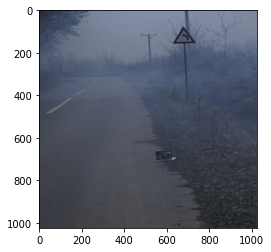

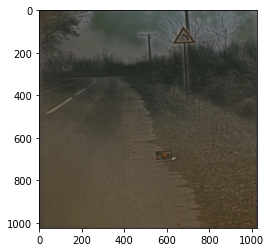

recon_loss 0.11926013231277466
perceptual_loss 0.4213820993900299
gen_loss 0.5029448866844177
disc loss 0.7141366600990295


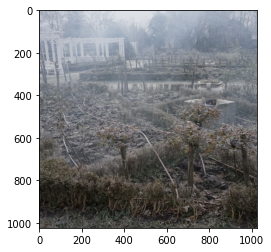

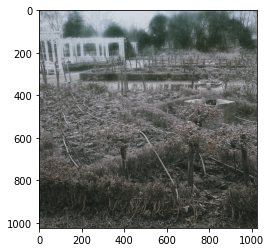

recon_loss 0.1124199628829956
perceptual_loss 0.4431988000869751
gen_loss 0.365648478269577
disc loss 0.6953427791595459


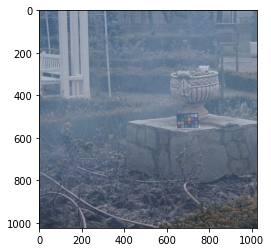

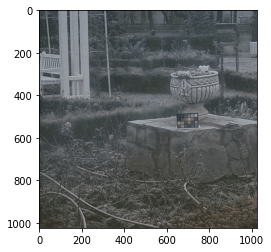

  0%|          | 0/45 [00:00<?, ?it/s]

recon_loss 0.0947844460606575
perceptual_loss 0.3004719316959381
gen_loss 0.28753793239593506
disc loss 0.7103168964385986


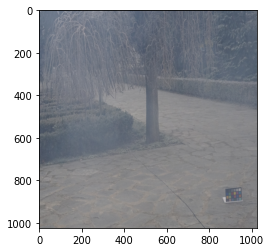

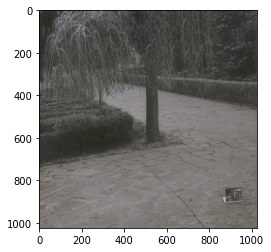

recon_loss 0.2894035279750824
perceptual_loss 0.4609302282333374
gen_loss 0.4736655056476593
disc loss 0.736802875995636


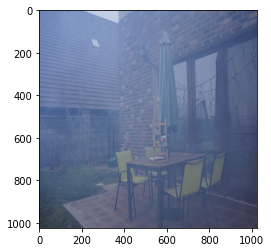

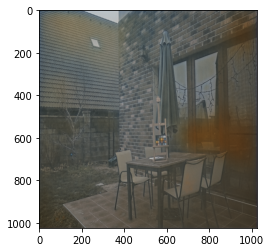

recon_loss 0.2231196165084839
perceptual_loss 1.226498007774353
gen_loss 0.29722732305526733
disc loss 0.7052469253540039


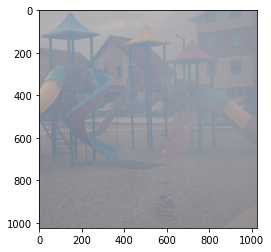

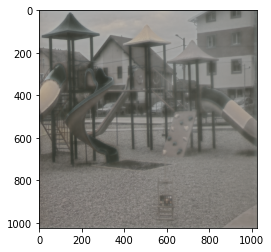

  0%|          | 0/45 [00:00<?, ?it/s]

recon_loss 0.1331334263086319
perceptual_loss 0.81861412525177
gen_loss 0.28926846385002136
disc loss 0.6981033086776733


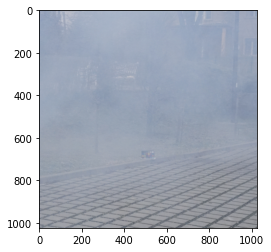

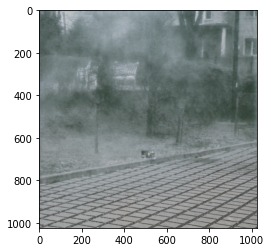

In [ ]:
for epoch in range(3, 6):

  for iteration, (hazy, dehazed) in enumerate(tqdm(train_loader)):

    # Training Generator
    gen_optim.zero_grad()

    gen_pred_fake = gen(hazy)

    # perceptual Loss
    perceptual_loss = 0.5 * mseLoss(feature_extractor(gen_pred_fake), feature_extractor(dehazed))
    perceptual_loss.backward(retain_graph=True)


    # reconstruction loss
    recon_loss = l1Loss(gen_pred_fake, dehazed)
    recon_loss.backward(retain_graph=True)

    # GAN Loss
    disc_pred_fake = disc(gen_pred_fake)
    labels = torch.ones_like(disc_pred_fake)
    gen_loss = 0.5 * criterion(disc_pred_fake, labels)
    gen_loss.backward()

    # update parameters
    gen_optim.step()

    # Training Discriminator
    disc_optim.zero_grad()

    gen_pred_fake = gen(hazy).detach()
    disc_pred_fake = disc(gen_pred_fake)
    fake_loss = criterion(disc_pred_fake, torch.zeros_like(disc_pred_fake))

    disc_pred_real = disc(dehazed)
    real_loss = criterion(disc_pred_real, torch.ones_like(disc_pred_real))

    loss = 1/2 * (fake_loss + real_loss)

    loss.backward()

    disc_optim.step()

    if iteration % 20 == 0:

      print("recon_loss", recon_loss.item())
      print("perceptual_loss", perceptual_loss.item())
      print("gen_loss", gen_loss.item())
      print("disc loss", loss.item())

      show_tensor_images(hazy)
      show_tensor_images(gen(hazy))

      torch.save({
          "generator_state_dict": gen.state_dict(),
          "generator_optimizer_dict": gen_optim.state_dict(),
          "discriminator_state_dict": disc.state_dict(),
          "disc_optimizer_dict": disc_optim.state_dict(),
      }, "/content/drive/MyDrive/dehazing_checkpoints/ckpt_epoch_{}_iter_{}.pth".format(epoch, iteration))